In [1]:
from __future__ import print_function
__author__= 'Sachin Verma'
import os

from scipy.optimize import curve_fit, minimize

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as pl


## Global setup

In [3]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
#distributions = ['chisq']
md = {} #Dictionary of Distribitions
means = {} # Dictionary of Means
all_means = []
#Generate 100 Sample sizes between N> 10 and N < 2000
sample_sizes=1990/(np.array(range(1,100)+[10]))
#print (sample_sizes, sample_sizes.shape)
sample_mean = 100


## Plot of Chi Square Distribution

In [4]:
#Generate 100 Sample sizes between N> 10 and N < 2000
#sample_sizes=1990/(np.array(range(1,100)+[10]))
#sample_sizes=(np.random.rand(100)*1000).astype(int)
#print (sample_sizes, sample_sizes.shape)

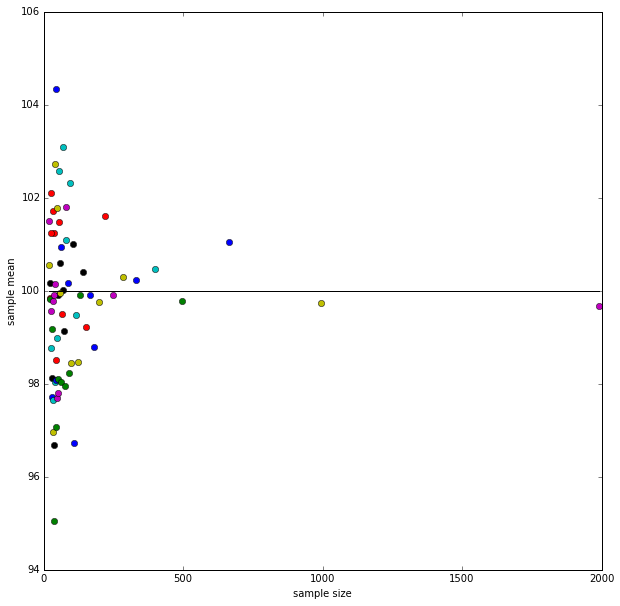

In [5]:
mean_chi = sample_mean
df_chi = mean_chi
md['chisq']={} 

for n in sample_sizes:
    md['chisq'][n] = np.random.chisquare(df_chi, size=n)

means['chisq'] = {}
fig_mu_N = pl.figure(figsize=(10,10))
axchisq_mu_n = fig_mu_N.add_subplot(111)
for nn in md['chisq'].iterkeys():
    means['chisq'][nn] = md['chisq'][nn].mean()
    all_means.append(means['chisq'][nn])
    #and plot it
    axchisq_mu_n.plot(nn, means['chisq'][nn], 'o')
    axchisq_mu_n.set_xlabel('sample size')
    axchisq_mu_n.set_ylabel('sample mean')
    axchisq_mu_n.plot([min(sample_sizes), max(sample_sizes)],[mean_chi,mean_chi], 'k')
    

## Plot of Poisson Distribution

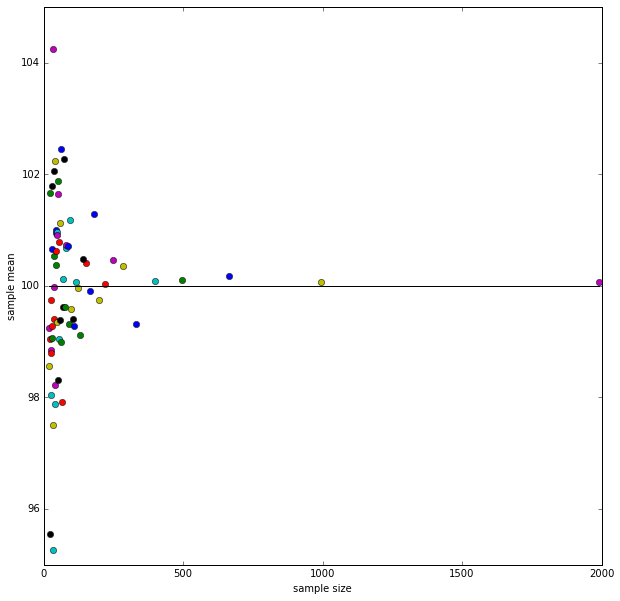

In [6]:
lmd = sample_mean
md['pois']={} 

for n in sample_sizes:
    md['pois'][n] = np.random.poisson(lmd, size=n)

means['pois'] = {}
fig_mu_N = pl.figure(figsize=(10,10))
ax_pois_mu_n = fig_mu_N.add_subplot(111)
for nn in md['pois'].iterkeys():
    means['pois'][nn] = md['pois'][nn].mean()
    all_means.append(means['pois'][nn])
    #and plot it
    ax_pois_mu_n.plot(nn, means['pois'][nn], 'o')
    ax_pois_mu_n.set_xlabel('sample size')
    ax_pois_mu_n.set_ylabel('sample mean')
    ax_pois_mu_n.plot([min(sample_sizes), max(sample_sizes)],[sample_mean,sample_mean], 'k')
    

## Plot of Gaussian(Normal) Distribution

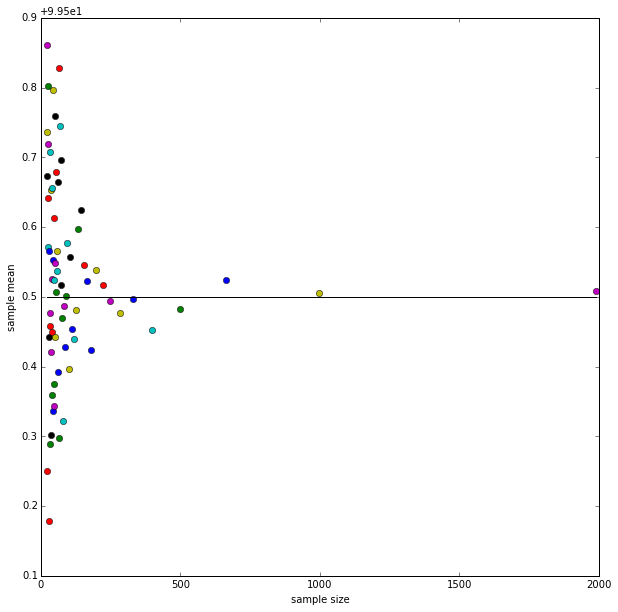

In [7]:
mean_gaus = sample_mean
sigma = 1
md['gaus']={} 

for n in sample_sizes:
    md['gaus'][n] = np.random.normal(mean_gaus, sigma, size=n)

means['gaus'] = {}
fig_mu_N = pl.figure(figsize=(10,10))
ax_gaus_mu_n = fig_mu_N.add_subplot(111)
for nn in md['gaus'].iterkeys():
    means['gaus'][nn] = md['gaus'][nn].mean()
    all_means.append(means['gaus'][nn])
    #and plot it
    ax_gaus_mu_n.plot(nn, means['gaus'][nn], 'o')
    ax_gaus_mu_n.set_xlabel('sample size')
    ax_gaus_mu_n.set_ylabel('sample mean')
    ax_gaus_mu_n.plot([min(sample_sizes), max(sample_sizes)],[sample_mean,sample_mean], 'k')
    

## Plot of Binomial Distribution

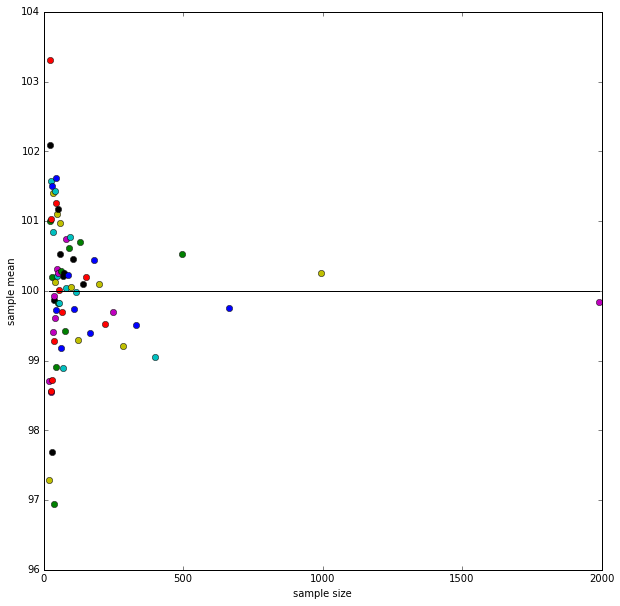

In [8]:
mean_binomial = sample_mean
my_p = 0.5
my_n = mean_binomial/my_p
md['binomial']={} 

for n in sample_sizes:
    md['binomial'][n] = np.random.binomial(my_n, my_p, size=n)

means['binomial'] = {}
fig_mu_N = pl.figure(figsize=(10,10))
ax_binomial_mu_n = fig_mu_N.add_subplot(111)
for nn in md['binomial'].iterkeys():
    means['binomial'][nn] = md['binomial'][nn].mean()
    all_means.append(means['binomial'][nn])
    #and plot it
    ax_binomial_mu_n.plot(nn, means['binomial'][nn], 'o')
    ax_binomial_mu_n.set_xlabel('sample size')
    ax_binomial_mu_n.set_ylabel('sample mean')
    ax_binomial_mu_n.plot([min(sample_sizes), max(sample_sizes)],[sample_mean,sample_mean], 'k')
    

## Plot of logistic Distribution

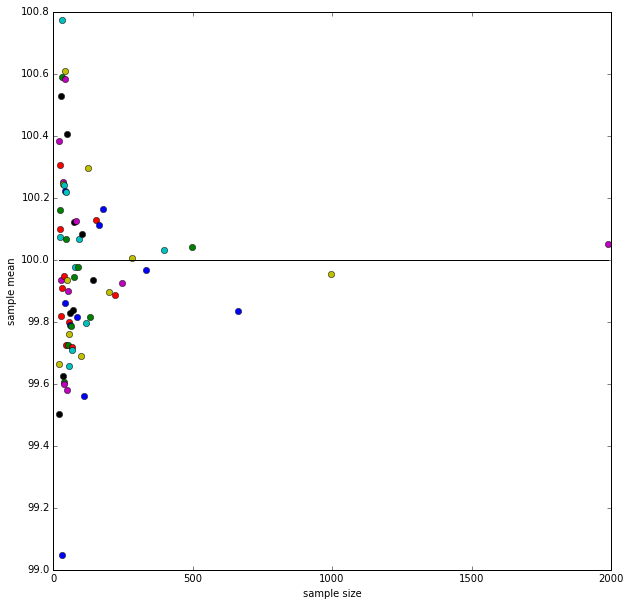

In [10]:
mean_logistic = sample_mean
lsigma = 1
md['logistic']={} 

for n in sample_sizes:
    md['logistic'][n] = np.random.logistic(mean_logistic, lsigma, size=n)

means['logistic'] = {}
fig_mu_N = pl.figure(figsize=(10,10))
ax_logistic_mu_n = fig_mu_N.add_subplot(111)
for nn in md['logistic'].iterkeys():
    means['logistic'][nn] = md['logistic'][nn].mean()
    all_means.append(means['logistic'][nn])
    #and plot it
    ax_logistic_mu_n.plot(nn, means['logistic'][nn], 'o')
    ax_logistic_mu_n.set_xlabel('sample size')
    ax_logistic_mu_n.set_ylabel('sample mean')
    ax_logistic_mu_n.plot([min(sample_sizes), max(sample_sizes)],[sample_mean,sample_mean], 'k')
    

## Plot of Laplace Distribution

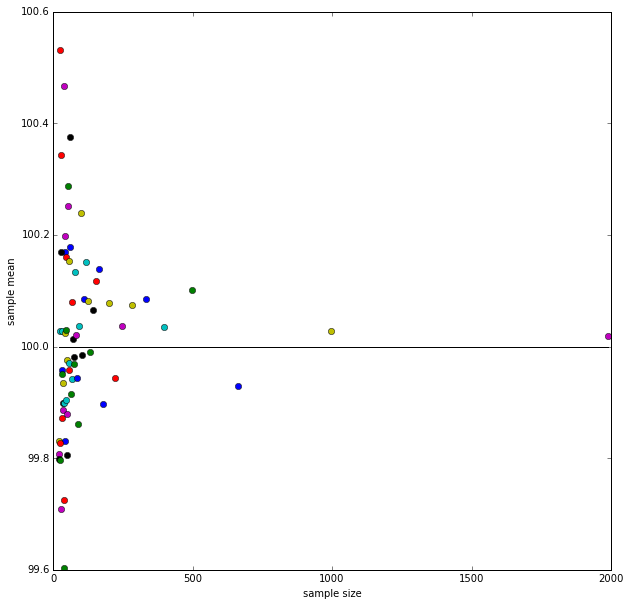

In [11]:
mean_lap = sample_mean
my_scale = 1
md['lap']={} 

for n in sample_sizes:
    md['lap'][n] = np.random.laplace(mean_lap, my_scale, size=n)

means['lap'] = {}
fig_mu_N = pl.figure(figsize=(10,10))
ax_lap_mu_n = fig_mu_N.add_subplot(111)
for nn in md['lap'].iterkeys():
    means['lap'][nn] = md['lap'][nn].mean()
    all_means.append(means['lap'][nn])
    #and plot it
    ax_lap_mu_n.plot(nn, means['lap'][nn], 'o')
    ax_lap_mu_n.set_xlabel('sample size')
    ax_lap_mu_n.set_ylabel('sample mean')
    ax_lap_mu_n.plot([min(sample_sizes), max(sample_sizes)],[sample_mean,sample_mean], 'k')
    

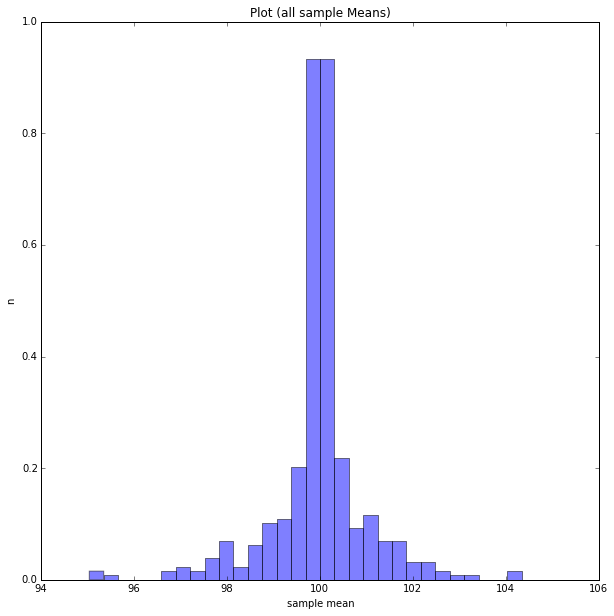

In [15]:
fig_hist = pl.figure(figsize=(10,10))
ax_hist = fig_hist.add_subplot(111)
ax_hist.hist(all_means, normed=1,alpha=0.5, bins=30)
ax_hist.set_xlabel('sample mean')
ax_hist.set_ylabel('n')
ax_hist.set_title('Plot (all sample Means)')